In [ ]:
!wget "https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt"
import numpy as np
import pandas as pd
import torch
import matplotlib
import seaborn as sns

--2023-03-16 16:26:44--  https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse.umn.edu (www-users.cse.umn.edu)|134.84.66.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘WhiteWine.txt’

WhiteWine.txt       100%[===================>] 258.23K   299KB/s    in 0.9s    

2023-03-16 16:26:45 (299 KB/s) - ‘WhiteWine.txt’ saved [264426/264426]



In [ ]:
df = pd.read_csv("WhiteWine.txt")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# **Part 1: Data Visualization and Analysis**

**1a. Histogram of Counts**

The rating/quality data does seem to be approximately normally distributed. The ratings that are the most common are 6, 5 and 7, in that order.
I think the ratings follow that distribution because it is hard to make anything to be perfectly tailors to everyone's tastes. Therefore, I think the judges felt like most of the wines they tasted were about average. This distribution will affect my prediction metrics by knowing that most wines will fall under a quality of 5-7. I think this will affect my prediction metrics because the qualities with the higher counts (e.g. 6) should be predicted more often.

<AxesSubplot:xlabel='quality', ylabel='count'>

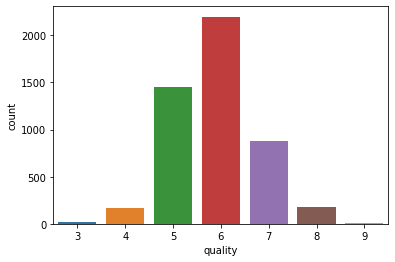

In [ ]:
sns.countplot(x=df["quality"])

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

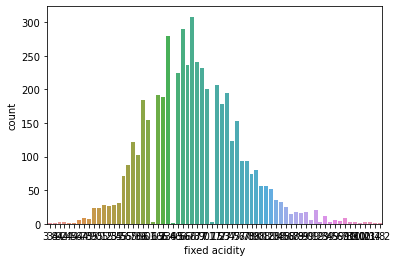

In [ ]:
sns.countplot(x=df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='count'>

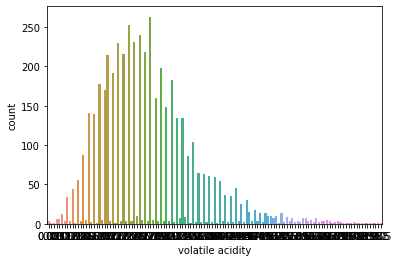

In [ ]:
sns.countplot(x=df["volatile acidity"])

<AxesSubplot:xlabel='citric acid', ylabel='count'>

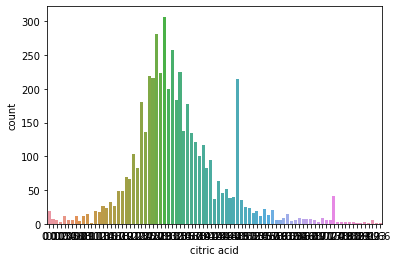

In [ ]:
sns.countplot(x=df["citric acid"])

<AxesSubplot:xlabel='residual sugar', ylabel='count'>

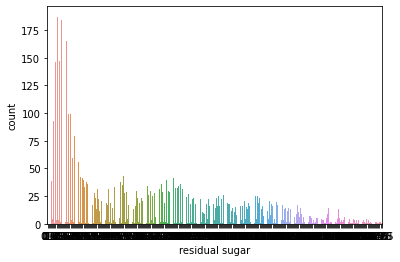

In [ ]:
sns.countplot(x=df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='count'>

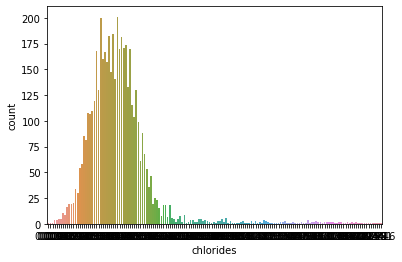

In [ ]:
sns.countplot(x=df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='count'>

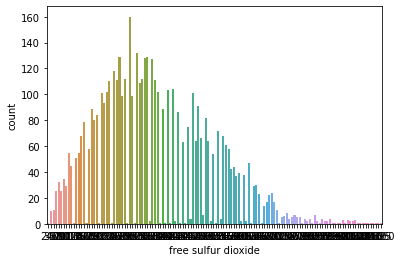

In [ ]:
sns.countplot(x=df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='count'>

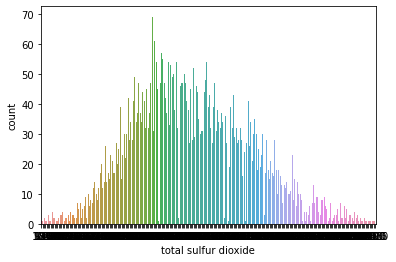

In [ ]:
sns.countplot(x=df["total sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='count'>

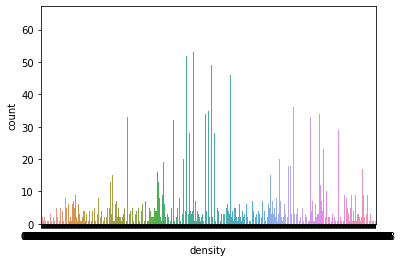

In [ ]:
sns.countplot(x=df["density"])

<AxesSubplot:xlabel='pH', ylabel='count'>

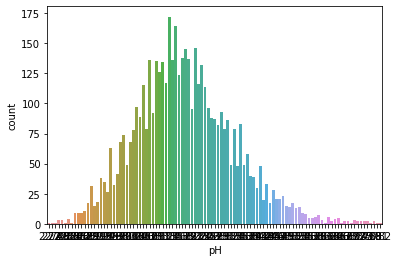

In [ ]:
sns.countplot(x=df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='count'>

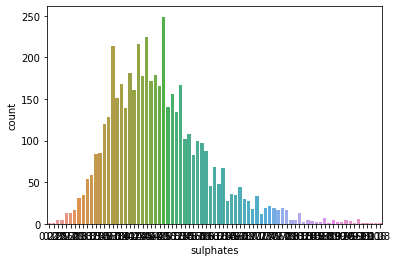

In [ ]:
sns.countplot(x=df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='count'>

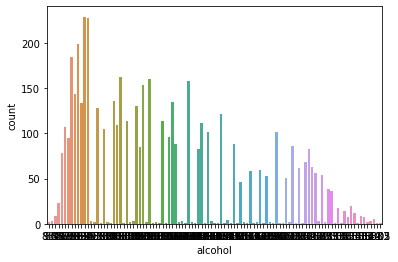

In [ ]:
sns.countplot(x=df["alcohol"])

**1b. Dense Histogram Plot + Pair-Wise Joint Plot**

**Dense Histogram Plot:** The distribution of alcohol to density does not look normal. It seems like alcohol content of 9/10 has the highest density. As you increase alcohol content the density slowly decreases, but if you decrease alcohol content, the density rapidly falls.
**Pair-Wise Joint Plot:** The relationship between alcohol content and density is still not very normal, although it looks more normal in the pair-wise joint plot. Furthermore, the relationship seems inverse. As alcohol content increases, the density decreases.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

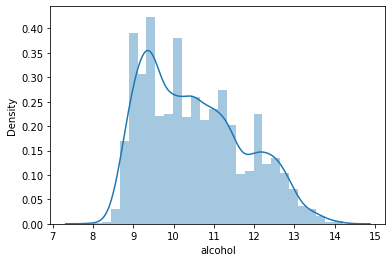

In [ ]:
sns.distplot(df['alcohol'], kde = True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

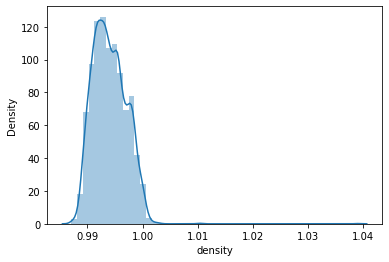

In [ ]:
sns.distplot(df['density'], kde = True)

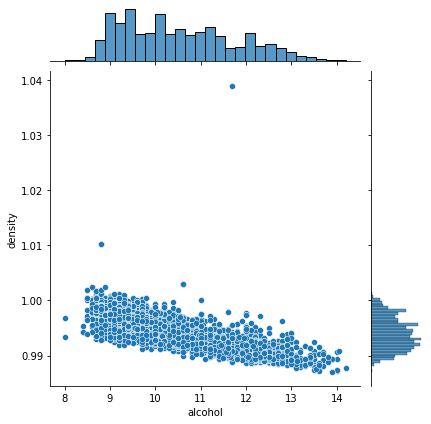

In [ ]:
sns.jointplot(x = df['alcohol'], y = df['density'])

**1c. Heatmap of Pairwise Correlation**

I see a clustering of high correlation in the middle with free sulfur dioxide, total sulfur dioxide and density. I also see trends with quality and alcohol having a high correlation and alcohol and density having a very low correlation.

<AxesSubplot:>

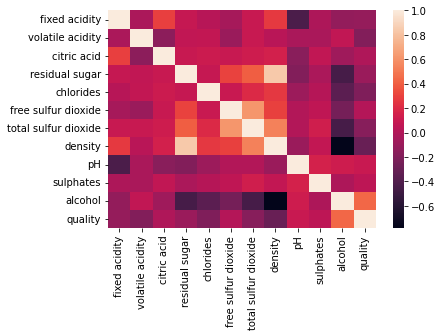

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)

# **Part 2: Parametric Modeling**

**2a. Linear Model**

I chose alcohol content as the input feature because I noticed that quality had the highest correlation with alcohol content in the heat map from part 1c. 
I also normalized both features. 
The equation for the unnormalized features is 
\begin{equation}
quality = ((0.4287(alcohol * 1.230620567757318) + 10.514267047774602 + 0.0017) * 0.8856385749678312) + 5.87790935075541
\end{equation}
Using Manhattan Distance to measure the quality of the model, it each point had an error rate of about 0.7087154984230036.

In [ ]:
def linearModel(params, inputs):
  y_pred = params[0]*inputs + params[1]
  return y_pred

In [ ]:
def gradDec(model, n_params, x, y, lr=0.001, n_epochs=2000, print_rate=200):

  params = .1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    y_pred = model(params, x)
    loss_tenor = (y_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_() 
    if epoch%print_rate==0:
      print("epoch:",epoch,"loss=",loss.item())

  return params

In [ ]:
print(df['alcohol'].mean())
print(df['alcohol'].std())
print(df['quality'].mean())
print(df['quality'].std())
feature_norm = (df['alcohol'] - df['alcohol'].mean())/df['alcohol'].std()
quality_norm = (df['quality'] - df['quality'].mean())/df['quality'].std()
params = gradDec(linearModel,2,torch.Tensor(feature_norm.to_numpy()),torch.Tensor(quality_norm.to_numpy()))
print(params)

10.514267047774602
1.230620567757318
5.87790935075541
0.8856385749678312
epoch: 0 loss= 0.9401821494102478
epoch: 200 loss= 0.8685174584388733
epoch: 400 loss= 0.8363369703292847
epoch: 600 loss= 0.8218865394592285
epoch: 800 loss= 0.8153977394104004
epoch: 1000 loss= 0.8124839067459106
epoch: 1200 loss= 0.8111755847930908
epoch: 1400 loss= 0.8105880618095398
epoch: 1600 loss= 0.8103242516517639
epoch: 1800 loss= 0.8102057576179504
tensor([0.4290, 0.0007], requires_grad=True)


In [ ]:
#manhattan distance
pred_a = []
pred_a_unormalized = []
total_dist = 0
for i in range(len(feature_norm)):
  y_pred =params[0].item() * feature_norm[i] + params[1].item()
  pred_a.append(y_pred)
  pred_a_unormalized.append(y_pred * df['quality'].std() +  df['quality'].mean())
  total_dist += abs(y_pred - quality_norm[i])
print(total_dist / len(feature_norm))


0.7087155301824789


<AxesSubplot:xlabel='quality'>

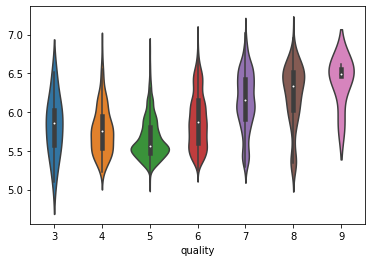

In [ ]:
sns.violinplot(x = df['quality'], y = pred_a_unormalized)

**2b. Multiple-Linear Model**

I chose alcohol content, sulphates and pH as the input features because I noticed that they had the highest correlation with quality according to the heat map from part 1c. I also normalized all the features. The equation for the unnormalized features is 
\begin{equation}
quality = ((0.4236((alcohol * 1.2306) + 10.5143) + 0.0535((sulphates *0.1141) + 0.4898) + 0.0426((pH * 0.1510) +3.1883) + 0.0017)  * 0.8856) + 5.8779
\end{equation}
Using Manhattan Distance to measure the quality of the model, it each point had an error rate of about 0.7030.

In [ ]:
def multiLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  return y_pred

In [ ]:
df = pd.read_csv("WhiteWine.txt")
features=["alcohol","sulphates","pH"]
x = torch.Tensor(df[features].values)
y = torch.Tensor(df["quality"].values)

In [ ]:
x_mean = x.mean(dim=0)
x_mean
x_std = x.std(dim=0)

In [ ]:
x_norm = (x-x_mean)/x_std
y_mean = y.mean(dim=0)
y_std = y.std(dim=0)
y_norm = (y-y_mean)/y_std

In [ ]:
print(x_mean)
print(x_std)
print(y_mean)
print(y_std)

tensor([10.5143,  0.4898,  3.1883])
tensor([1.2306, 0.1141, 0.1510])
tensor(5.8779)
tensor(0.8856)


In [ ]:
params = gradDec(multiLinearModel,4,x_norm,y_norm,0.001)

epoch: 0 loss= 0.9564160704612732
epoch: 200 loss= 0.8715192079544067
epoch: 400 loss= 0.8343961238861084
epoch: 600 loss= 0.818061113357544
epoch: 800 loss= 0.8108267784118652
epoch: 1000 loss= 0.8076010346412659
epoch: 1200 loss= 0.8061526417732239
epoch: 1400 loss= 0.8054975271224976
epoch: 1600 loss= 0.8051987886428833
epoch: 1800 loss= 0.8050614595413208


In [ ]:
#manhattan distance
pred_b = []
pred_b_unormalized = []
total_dist = 0
for i in range(len(x_norm)):
  y_pred = params[0].item() * x_norm[i][0] + params[1].item() * x_norm[i][1] + params[2].item() * x_norm[i][2] + params[3].item()
  pred_b.append(y_pred.item())
  pred_b_unormalized.append(y_pred.item() * y_std.item() + y_mean.item())
  total_dist += abs(y_pred - y_norm[i])
print(total_dist / len(x_norm))

tensor(0.7030)


<AxesSubplot:xlabel='quality'>

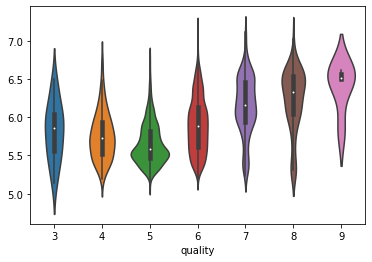

In [ ]:
sns.violinplot(x =df["quality"], y = pred_b_unormalized)

**2c. Non-Linear Model**

I chose alcohol and sulphates as the input features because I noticed they were not highly correlated. I also normalized all the features. The equation for the unnormalized features is 
\begin{equation}
quality = ((0.4943((residualSugar * 5.0721) + 6.3914) - 0.75((density * 0.0029909) + 0.9940) + 0.0315 * ((residualSugar * 5.0721) + 6.3914) * ((density * 0.0029909) + 0.9940) - 0.0265)  * 0.8856) + 5.8779
\end{equation} 
Using Manhattan Distance to measure the quality of the model, it each point had an error rate of about 0.7155.

In [ ]:
def multiLinearModel_withInteraction(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*(inputs[:,0]*inputs[:,1]) + params[3]
  return y_pred


In [ ]:
df = pd.read_csv("WhiteWine.txt")
features=["alcohol","sulphates"]
x = torch.Tensor(df[features].values)
y = torch.Tensor(df["quality"].values)

In [ ]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)
x_mean

tensor([10.5143,  0.4898])

In [ ]:
x_norm = (x-x_mean)/x_std
y_std = y.std(dim=0)
y_mean = y.mean(dim=0)
y_norm = (y-y_mean)/y_std

In [ ]:
print(x_mean)
print(x_std)
print(y_mean)
print(y_std)

tensor([10.5143,  0.4898])
tensor([1.2306, 0.1141])
tensor(5.8779)
tensor(0.8856)


In [ ]:
gradDec(multiLinearModel_withInteraction,4,x_norm,y_norm,0.005,2000)

epoch: 0 loss= 0.9941251873970032
epoch: 200 loss= 0.8097527027130127
epoch: 400 loss= 0.8064106106758118
epoch: 600 loss= 0.8063488602638245
epoch: 800 loss= 0.8063477277755737
epoch: 1000 loss= 0.8063476085662842
epoch: 1200 loss= 0.8063477277755737
epoch: 1400 loss= 0.806347668170929
epoch: 1600 loss= 0.806347668170929
epoch: 1800 loss= 0.806347668170929


tensor([4.3676e-01, 6.0622e-02, 2.5009e-03, 4.4096e-05], requires_grad=True)

In [ ]:
#manhattan distance
pred_c = []
pred_c_unormalized = []
total_dist = 0
for i in range(len(x_norm)):
  y_pred = params[0].item() * x_norm[i][0] - params[1].item() * x_norm[i][1] + params[2].item() * x_norm[i][0] * x_norm[i][1] - params[3].item()
  pred_c.append(y_pred.item())
  pred_c_unormalized.append(y_pred.item() * y_std.item() + y_mean.item())
  total_dist += abs(y_pred - y_norm[i])
print(total_dist / len(x_norm))

tensor(0.7130)


<AxesSubplot:xlabel='quality'>

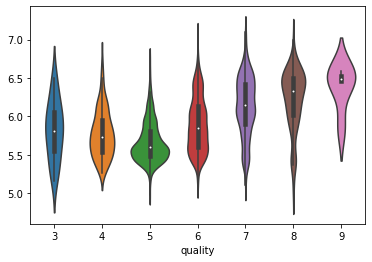

In [ ]:
sns.violinplot(x =df["quality"], y = pred_c_unormalized)

# **Part 3: Accuracy**

The accuracies for the different models were very close together (not significantly different), but if I had to choose, I think the linear model did the best because it had the highest accuracy for the smallest threshold, which I think is important because that means it had more predictions that were very close to the actual value.


In [ ]:
def threshold_accuracy(y_pred, threshold):
  correct = 0
  for i in range(len(y_norm)):
    if abs(y_norm[i] - y_pred[i]) <= threshold:
      correct +=1
  return correct / len(y_pred)

In [ ]:
print("Threshold accuracies for Linear Model:")
print("Threshold 0.25: ", threshold_accuracy(pred_a, 0.25))
print("Threshold 0.5: ", threshold_accuracy(pred_a, 0.5))
print("Threshold 1.0: ", threshold_accuracy(pred_a, 1.0))
print("Threshold accuracies for MultiLinear Model:")
print("Threshold 0.25: ", threshold_accuracy(pred_b, 0.25))
print("Threshold 0.5: ", threshold_accuracy(pred_b, 0.5))
print("Threshold 1.0: ", threshold_accuracy(pred_b, 1.0))
print("Threshold accuracies for NonLinear Model:")
print("Threshold 0.25: ", threshold_accuracy(pred_c, 0.25))
print("Threshold 0.5: ", threshold_accuracy(pred_c, 0.5))
print("Threshold 1.0: ", threshold_accuracy(pred_c, 1.0))

Threshold accuracies for Linear Model:
Threshold 0.25:  0.18313597386688443
Threshold 0.5:  0.407309105757452
Threshold 1.0:  0.7895059207839935
Threshold accuracies for MultiLinear Model:
Threshold 0.25:  0.18272764393630053
Threshold 0.5:  0.4169048591261739
Threshold 1.0:  0.7862392813393222
Threshold accuracies for NonLinear Model:
Threshold 0.25:  0.17619436504695793
Threshold 0.5:  0.4001633319722336
Threshold 1.0:  0.7809309922417313


# **Part 4: Cross Validation**

Using K-fold cross validation with k = 5, I found that the linear and multilinear model did the best. The linear model did better with lower thresholds, and the multilinear model did better with higher thresholds. Overall, I think the linear model did the best because I think it is more important for our model to do better with a lower threshold.
I think there is a significant difference between the models, because for a threshold of 0.25, the linear model had 5% more accuracy than the multilinear model and about 13% more accuracy than the nonlinear model. Furthermore, for a threshold of 1.0, the multilinear model had about 12% more accuracy than the linear model and about 39% more accuracy than the nonlinear model. 

In [ ]:
def crossvalidation_threshold_accuracy(y_test, y_pred, threshold):
  correct = 0
  for i in range(len(y_pred)):
    if abs(y_test[i] - y_pred[i]) <= threshold:
      correct +=1
  return correct / len(y_pred)

In [ ]:
def linear_model(params, x_test):
  pred_a = []
  for i in range(len(x_test)):
    y_pred = params[0].item() * x_test[i] + params[1].item()
    pred_a.append(y_pred)
  return pred_a

In [ ]:
def multi_linear_model(params, x_test):
  pred_b = []
  for i in range(len(x_test)):
    y_pred = params[0].item() * x_test[i][0] + params[1].item() * x_test[i][1] + params[2].item() * x_test[i][2] + params[3].item()
    pred_b.append(y_pred)
  return pred_b

In [ ]:
def non_linear_model(params, x_test):
  pred_c = []
  for i in range(len(x_test)):
    y_pred = params[0].item() * x_test[i][0] - params[1].item() * x_test[i][1] + params[2].item() * x_test[i][0] * x_test[i][1] - params[3].item()
    pred_c.append(y_pred)
  return pred_c

In [ ]:
#K fold cross validation
def k_split(k, x, y):
  x_folds = [[]] * k
  y_folds = [[]] * k
  for i in range(len(x)):
    x_folds[i%5].append(x[i])
    y_folds[i%5].append(y[i])
  return (x_folds, y_folds)

In [ ]:
def cross_train_linear_model(k):
  avg_accuracies = [0] * 3 #0.25, 0.5, 1.0
  #normalize data
  x = df['alcohol']
  y = df['quality']
  x_folds, y_folds = k_split(k, x, y)
  #loop through folds
  for leave_out in range(k):
    print("Leaving out fold ", leave_out)
    #create training and testing
    x_train = []
    y_train = []
    x_test = None
    y_test = None
    for i in range(k):
      if i == leave_out:
        x_test = x_folds[leave_out]
        y_test = y_folds[leave_out]
      else:
        x_train.extend(x_folds[i])
        y_train.extend(x_folds[i])
    x_test = torch.Tensor(x_test)
    y_test = torch.Tensor(y_test)
    x_train = torch.Tensor(x_train)
    y_train = torch.Tensor(y_train)
    x_test = (x_test - x_test.mean())/x_test.std()
    y_test = (y_test - y_test.mean())/y_test.std()
    x_train = (x_train - x_train.mean())/x_train.std()
    y_train = (y_train - y_train.mean())/y_train.std()

    #create the linear model
    params = gradDec(linearModel,2,(x_train),(y_train))
    print(params)
    predicted_y_test = linear_model(params, x_test)
    #compute threshold accuracies
    avg_accuracies[0] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.25)
    avg_accuracies[1] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.5)
    avg_accuracies[2] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 1.0)
    print("\n")
  avg_accuracies[0] /= k
  avg_accuracies[1] /= k
  avg_accuracies[2] /= k
  return avg_accuracies

In [ ]:
def cross_train_multilinear_model(k):
  avg_accuracies = [0] * 3 #0.25, 0.5, 1.0
  df = pd.read_csv("WhiteWine.txt")
  #normalize data
  features=["alcohol","sulphates","pH"]
  x = torch.Tensor(df[features].values)
  y = torch.Tensor(df["quality"].values)
  x_mean = x.mean(dim=0)
  x_std = x.std(dim=0)
  x_norm = (x-x_mean)/x_std
  y_mean = y.mean(dim=0)
  y_std = y.std(dim=0)
  y_norm = (y-y_mean)/y_std

  x_folds, y_folds = k_split(k, x_norm, y_norm)
  #loop through folds
  for leave_out in range(k):
    print("Leaving out fold ", leave_out)
    #create training and testing
    x_train = []
    y_train = []
    x_test = None
    y_test = None
    for i in range(k):
      if i == leave_out:
        x_test = x_folds[leave_out]
        y_test = y_folds[leave_out]
      else:
        x_train.extend(x_folds[i])
        y_train.extend(x_folds[i])
    #create the linear model
    params = gradDec(multiLinearModel,4,x_norm,y_norm,0.001)
    predicted_y_test = multi_linear_model(params, x_test)
    #compute threshold accuracies
    avg_accuracies[0] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.25)
    avg_accuracies[1] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.5)
    avg_accuracies[2] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 1.0)
    print("\n")
  avg_accuracies[0] /= k
  avg_accuracies[1] /= k
  avg_accuracies[2] /= k
  return avg_accuracies

In [ ]:
def cross_train_nonlinear_model(k):
  avg_accuracies = [0] * 3 #0.25, 0.5, 1.0
  #normalize data
  df = pd.read_csv("WhiteWine.txt")
  features=["residual sugar","density"]
  x = torch.Tensor(df[features].values)
  y = torch.Tensor(df["quality"].values)
  x_mean = x.mean(dim=0)
  x_std = x.std(dim=0)
  x_norm = (x-x_mean)/x_std
  y_mean = y.mean(dim=0)
  y_std = y.std(dim=0)
  y_norm = (y-y_mean)/y_std

  x_folds, y_folds = k_split(k, x_norm, y_norm)
  #loop through folds
  for leave_out in range(k):
    print("Leaving out fold ", leave_out)
    #create training and testing
    x_train = []
    y_train = []
    x_test = None
    y_test = None
    for i in range(k):
      if i == leave_out:
        x_test = x_folds[leave_out]
        y_test = y_folds[leave_out]
      else:
        x_train.extend(x_folds[i])
        y_train.extend(x_folds[i])
    #create the linear model
    params = gradDec(multiLinearModel_withInteraction,4,x_norm,y_norm,0.005,2000)
    predicted_y_test = non_linear_model(params, x_test)
    #compute threshold accuracies
    avg_accuracies[0] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.25)
    avg_accuracies[1] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 0.5)
    avg_accuracies[2] += crossvalidation_threshold_accuracy(y_test, predicted_y_test, 1.0)
    print("\n")
  avg_accuracies[0] /= k
  avg_accuracies[1] /= k
  avg_accuracies[2] /= k
  return avg_accuracies

In [ ]:
k = 5
print("Running linear model")
linear_accuracies = cross_train_linear_model(k)
print("Running multilinear model")
multilinear_accuracies = cross_train_multilinear_model(k)
print("Running nonlinear model")
nonlinear_accuracies = cross_train_nonlinear_model(k)

Running linear model
Leaving out fold  0
epoch: 0 loss= 0.9629988074302673
epoch: 200 loss= 0.43237438797950745
epoch: 400 loss= 0.19413088262081146
epoch: 600 loss= 0.0871623083949089
epoch: 800 loss= 0.03913472592830658
epoch: 1000 loss= 0.01757102645933628
epoch: 1200 loss= 0.007889192551374435
epoch: 1400 loss= 0.0035421322099864483
epoch: 1600 loss= 0.001590351457707584
epoch: 1800 loss= 0.000714066089130938
tensor([9.8211e-01, 6.7047e-04], requires_grad=True)


Leaving out fold  1
epoch: 0 loss= 0.9975001811981201
epoch: 200 loss= 0.44786500930786133
epoch: 400 loss= 0.20108568668365479
epoch: 600 loss= 0.09028465300798416
epoch: 800 loss= 0.04053669050335884
epoch: 1000 loss= 0.018200501799583435
epoch: 1200 loss= 0.00817175954580307
epoch: 1400 loss= 0.0036690346896648407
epoch: 1600 loss= 0.0016473325667902827
epoch: 1800 loss= 0.0007396346190944314
tensor([0.9818, 0.0014], requires_grad=True)


Leaving out fold  2
epoch: 0 loss= 0.941180944442749
epoch: 200 loss= 0.4225785136

In [ ]:
print("Threshold accuracies for Linear Model:")
print("Threshold 0.25: ", linear_accuracies[0])
print("Threshold 0.5: ", linear_accuracies[1])
print("Threshold 1.0: ", linear_accuracies[2])
print("\nThreshold accuracies for MultiLinear Model:")
print("Threshold 0.25: ", multilinear_accuracies[0])
print("Threshold 0.5: ", multilinear_accuracies[1])
print("Threshold 1.0: ", multilinear_accuracies[2])
print("\nThreshold accuracies for NonLinear Model:")
print("Threshold 0.25: ", nonlinear_accuracies[0])
print("Threshold 0.5: ", nonlinear_accuracies[1])
print("Threshold 1.0: ", nonlinear_accuracies[2])

Threshold accuracies for Linear Model:
Threshold 0.25:  0.23732135565536955
Threshold 0.5:  0.4109840751327073
Threshold 1.0:  0.6668027766435279

Threshold accuracies for MultiLinear Model:
Threshold 0.25:  0.18276847692935894
Threshold 0.5:  0.4170681910984075
Threshold 1.0:  0.7863617803184975

Threshold accuracies for NonLinear Model:
Threshold 0.25:  0.10347080440996326
Threshold 0.5:  0.20930992241731322
Threshold 1.0:  0.3968150265414455


# **Extra Credit**

I optimized my hyperparameter k by running KNN Regression on values of 2-29 for K and choosing the one with the highest accuracy which was k = 2. K=2 had an accuracy of 91% which is better than the accuracy of the original author's models.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def ec_threshold_accuracy(y_pred, y_actual, threshold):
  correct = 0
  for i in range(len(y_norm)):
    if abs(y_actual[i] - y_pred[i]) <= threshold:
      correct +=1
  return correct / len(y_pred)

In [ ]:
features=["alcohol","sulphates","pH"]
x = df[features]
y = df['quality']
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()
for i in range(2, 30):
  print("k: ", i)
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(x, y)
  pred = neigh.predict(x)
  print(ec_threshold_accuracy(pred, y, 1.0))


k:  2
0.9101674152715394
k:  3
0.9034299714169048
k:  4
0.8746427113107391
k:  5
0.8670886075949367
k:  6
0.8638219681502655
k:  7
0.856267864434463
k:  8
0.8525928950592079
k:  9
0.8091057574520212
k:  10
0.8168640261331156
k:  11
0.819314005716619
k:  12
0.8178848509595753
k:  13
0.8182931808901592
k:  14
0.8203348305430788
k:  15
0.8178848509595753
k:  16
0.8172723560636995
k:  17
0.8182931808901592
k:  18
0.7982850142915475
k:  19
0.8052266231114741
k:  20
0.8070641077991016
k:  21
0.8131890567578604
k:  22
0.8113515720702328
k:  23
0.814822376480196
k:  24
0.8174765210289914
k:  25
0.8203348305430788
k:  26
0.8211514904042466
k:  27
0.8076766026949775
k:  28
0.8097182523478971
k:  29
0.8084932625561454


In [ ]:
  neigh = KNeighborsRegressor(n_neighbors=2)
  neigh.fit(x, y)
  pred = neigh.predict(x)
  print(ec_threshold_accuracy(pred, y, 1.0))

0.9101674152715394
